## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_full = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how="inner") 

# Display the data table for preview
mouse_results_full.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
len(mouse_results_full["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_results_full.loc[mouse_results_full.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse_df = mouse_results_full[mouse_results_full["Mouse ID"] == 'g989']
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_results_clean = mouse_results_full[mouse_results_full["Mouse ID"].isin(duplicate_mice)==False] 


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_results_clean["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_summary_stats = {
    "Mean Tumor Volume" : mouse_results_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"],
    "Median Tumor Volume" : mouse_results_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"],
    "Tumor Volume Variance" : mouse_results_clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"],
    "STD of Tumor Volume" : mouse_results_clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"],  
    "SEM of Tumor Volume" : mouse_results_clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
}
mouse_summary_stats_df = pd.DataFrame(mouse_summary_stats)
mouse_summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = mouse_results_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

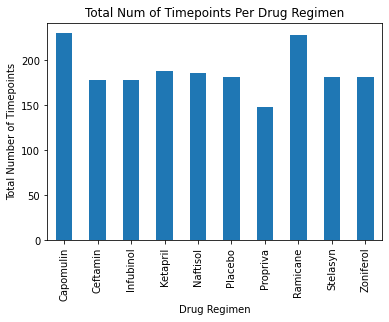

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_totals = mouse_results_clean.groupby("Drug Regimen")["Timepoint"].count()

drug_regimen_totals.plot(
    kind="bar", 
    ylabel = "Total Number of Timepoints", 
    title = "Total Num of Timepoints Per Drug Regimen"
)

plt.show()

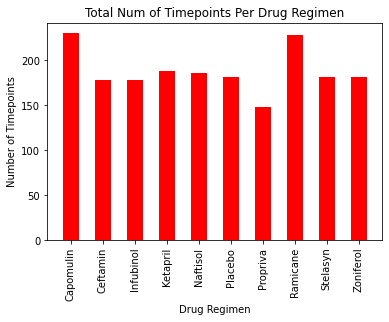

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = drug_regimen_totals.index
plt.bar(drugs, drug_regimen_totals, width=0.5, color = 'red')
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Num of Timepoints Per Drug Regimen")

plt.show()

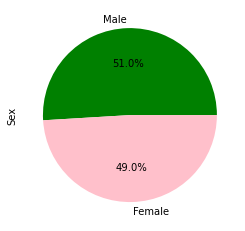

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


sex_data = mouse_results_clean["Sex"].value_counts()

sex_data.plot(kind="pie", autopct='%1.1f%%', colors = ['green', 'pink'])
plt.show()

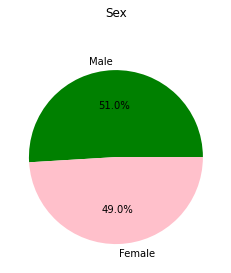

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_results_clean["Sex"].unique()

plt.pie(sex_data, labels=labels, autopct='%1.1f%%', colors = ['green', 'pink'])
plt.title("Sex", pad = 32)
plt.show() 

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(mouse_results_clean.groupby("Mouse ID").max()["Timepoint"])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_vol_df = pd.merge(max_timepoint_df, mouse_results_clean, on = ("Mouse ID", "Timepoint"), how="left") 


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Add values to list
for treatment in treatments:
    treatment_df = max_timepoint_vol_df[max_timepoint_vol_df["Drug Regimen"] == treatment]
    tumor_vol_data.append(list(treatment_df["Tumor Volume (mm3)"]))



In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    treatment_df = max_timepoint_vol_df[max_timepoint_vol_df["Drug Regimen"] == treatment]
    quartiles = treatment_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of {treatment} treatments is: {lowerq}")
    print(f"The upper quartile of {treatment} treatments is: {upperq}")
    print(f"The interquartile range of {treatment} treatments is: {iqr}")
    print(f"The the median of {treatment} treatments is: {quartiles[0.5]} ")
    print(" ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
   
   
    print(" ")
    
    # outliers
    df_outliers = treatment_df[(treatment_df["Tumor Volume (mm3)"] < lower_bound) | (treatment_df["Tumor Volume (mm3)"] > upper_bound)]
    print(f"{treatment} Potential Outliers:")
    print(df_outliers["Tumor Volume (mm3)"])   

    print("-"*45)

The lower quartile of Capomulin treatments is: 32.37735684
The upper quartile of Capomulin treatments is: 40.1592203
The interquartile range of Capomulin treatments is: 7.781863460000004
The the median of Capomulin treatments is: 38.1251644 
 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 
Capomulin Potential Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------
The lower quartile of Ramicane treatments is: 31.56046955
The upper quartile of Ramicane treatments is: 40.65900627
The interquartile range of Ramicane treatments is: 9.098536719999998
The the median of Ramicane treatments is: 36.56165229 
 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
 
Ramicane Potential Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------
The lower quartile of Infubinol treatments is: 54.04860769
The u

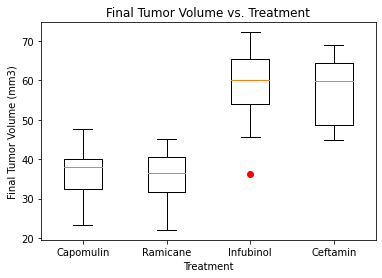

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, sym = "red")
plt.xticks([1,2,3,4], treatments)
plt.xlabel("Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume vs. Treatment")
plt.show()

## Line and Scatter Plots

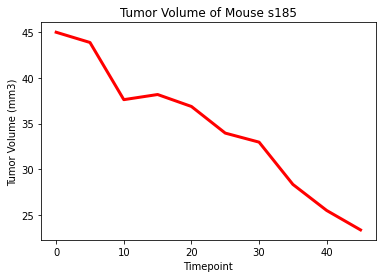

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_df = mouse_results_clean[mouse_results_clean["Mouse ID"] == "s185"]
s185_timepoints = s185_df["Timepoint"] 
s185_tumor_volume = s185_df["Tumor Volume (mm3)"]

plt.plot(s185_timepoints, s185_tumor_volume, color = "red", linewidth=3)
plt.title("Tumor Volume of Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
          
plt.show()

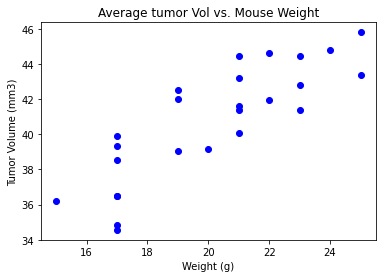

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = mouse_results_clean[mouse_results_clean["Drug Regimen"] == "Capomulin"]

mouse_weight = capomulin_regimen.groupby("Mouse ID").mean()["Weight (g)"]
ave_tumor_volume = capomulin_regimen.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

plt.scatter(mouse_weight, ave_tumor_volume, color = "blue")
plt.title("Average tumor Vol vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

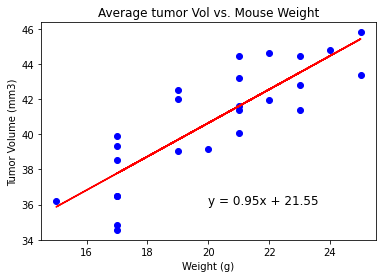

The correlation coefficient is: 0.8419
slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
stderr:0.12754359033201323


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, ave_tumor_volume)
regress_values = mouse_weight * slope + intercept

plt.plot(mouse_weight, regress_values, color = "red")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(mouse_weight, ave_tumor_volume, color = "blue")
plt.title("Average tumor Vol vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)") 
plt.annotate(line_eq, (20,36), fontsize = 12, color = "black")

plt.show()


print("The correlation coefficient is: " + str(round(rvalue,4)))
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")

In [21]:
#Analysis
# Average tumor volume seems to be strongly and postively correlated with mouse weight. 
# Capomulin and Ramicane have much smaller tumor volumes at the end of treatment than Infubinol and Ceftamin.
# Only Infubinol has outliers of the four drugs compared in the box plot.